<a href="https://colab.research.google.com/github/ahmedhussein2001/ML-projects/blob/main/post_operative_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/post-operative-data.csv')
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,mid,mid,excellent,mid,unstable,stable,stable,15,S
87,mid,mid,good,mid,unstable,stable,stable,15,A
88,mid,mid,excellent,mid,unstable,stable,stable,10,A


In [3]:
df.columns

Index(['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL',
       'COMFORT', 'decision ADM-DECS'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   L-CORE             90 non-null     object
 1   L-SURF             90 non-null     object
 2   L-O2               90 non-null     object
 3   L-BP               90 non-null     object
 4   SURF-STBL          90 non-null     object
 5   CORE-STBL          90 non-null     object
 6   BP-STBL            90 non-null     object
 7   COMFORT            90 non-null     object
 8   decision ADM-DECS  90 non-null     object
dtypes: object(9)
memory usage: 6.5+ KB


In [5]:
df.columns =  [col.strip().lower().replace(' ','_') for col in df.columns]

In [6]:
df

,l-core,l-surf,l-o2,l-bp,surf-stbl,core-stbl,bp-stbl,comfort,decision_adm-decs
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
...,...,...,...,...,...,...,...,...,...
85,mid,mid,excellent,mid,unstable,stable,stable,10,A
86,mid,mid,excellent,mid,unstable,stable,stable,15,S
87,mid,mid,good,mid,unstable,stable,stable,15,A
88,mid,mid,excellent,mid,unstable,stable,stable,10,A


In [7]:
df['decision_adm-decs'].value_counts()

,count
decision_adm-decs,
A,63
S,24
I,2
A,1


In [8]:
df['comfort'] = df['comfort'].replace({'?' : 0})

In [9]:
df['comfort'] = df['comfort'].astype('int')

# Visualization

<Axes: xlabel='decision_adm-decs', ylabel='Count'>

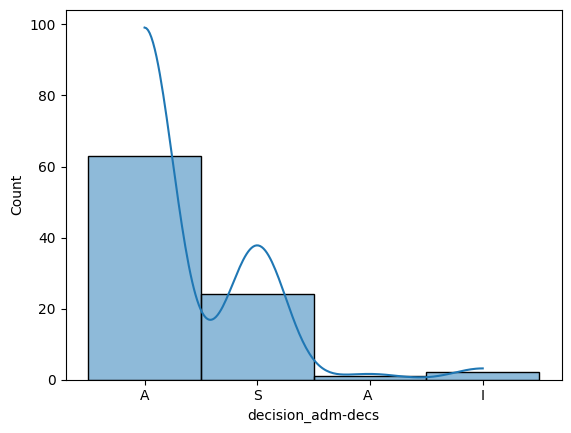

In [10]:
sns.histplot(data=df,bins=5,kde=True , x='decision_adm-decs')

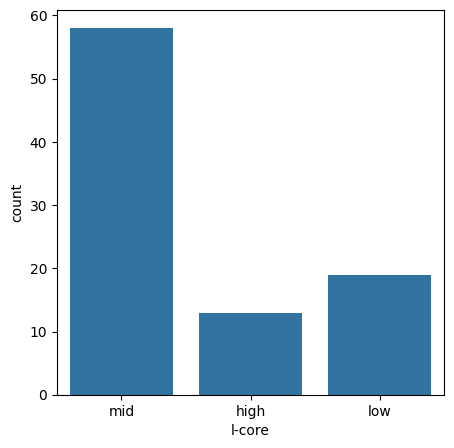

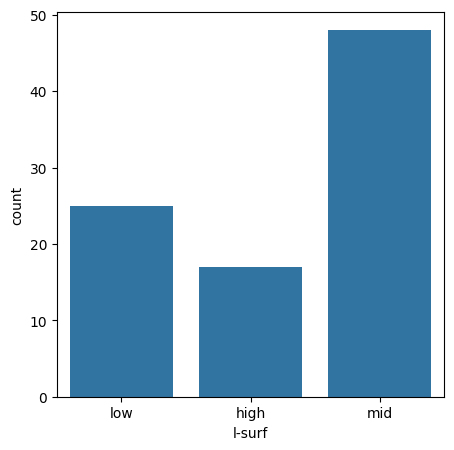

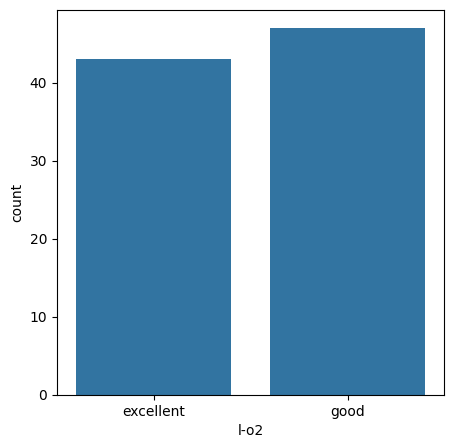

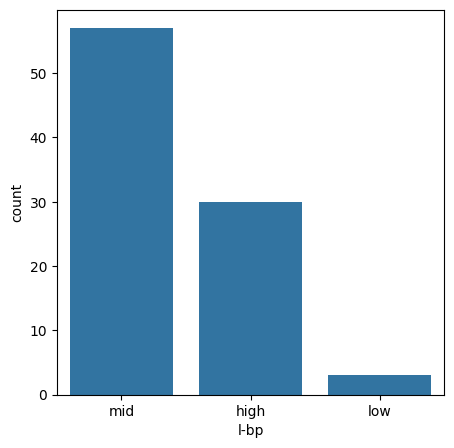

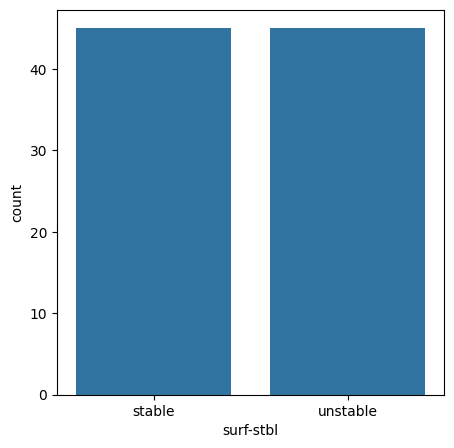

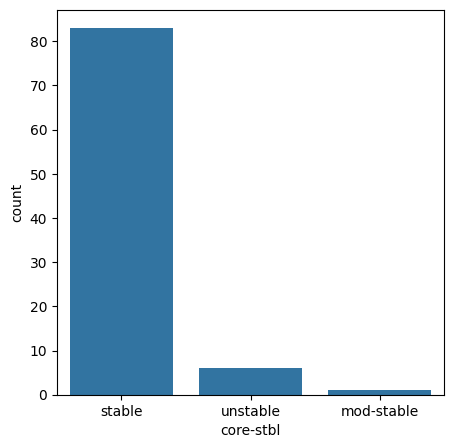

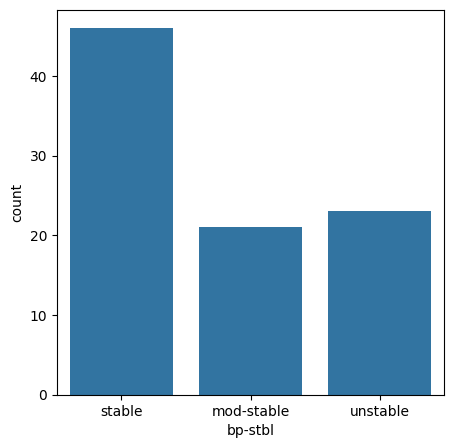

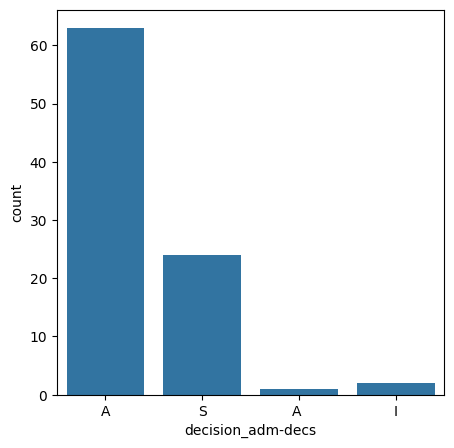

In [11]:
cat_columns = df.select_dtypes(exclude=np.number).columns
cat_columns
for i in cat_columns:
  plt.figure(figsize=(5,5))
  sns.countplot(data=df,x=i)

# ML Code

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
le = LabelEncoder()
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

In [14]:
x = df.drop('decision_adm-decs',axis=1)                      # feature
y = df['decision_adm-decs']                                  # target

In [15]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42,shuffle=True)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((67, 8), (23, 8), (67,), (23,))

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6521739130434783


In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: {conf_matrix}")

Confusion Matrix: [[15  5]
 [ 3  0]]


In [20]:
report = classification_report(y_test, y_pred)
print(f"Classification Report: {report}")

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           3       0.00      0.00      0.00         3

    accuracy                           0.65        23
   macro avg       0.42      0.38      0.39        23
weighted avg       0.72      0.65      0.69        23



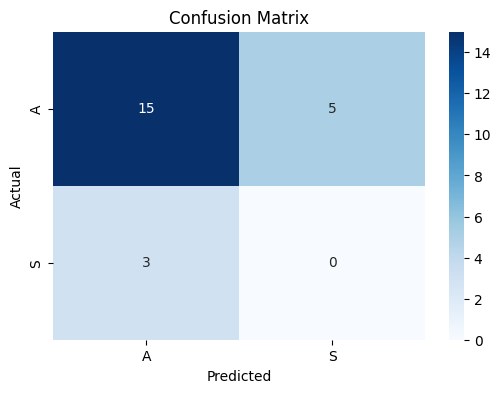

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["A", "S"], yticklabels=["A", "S"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

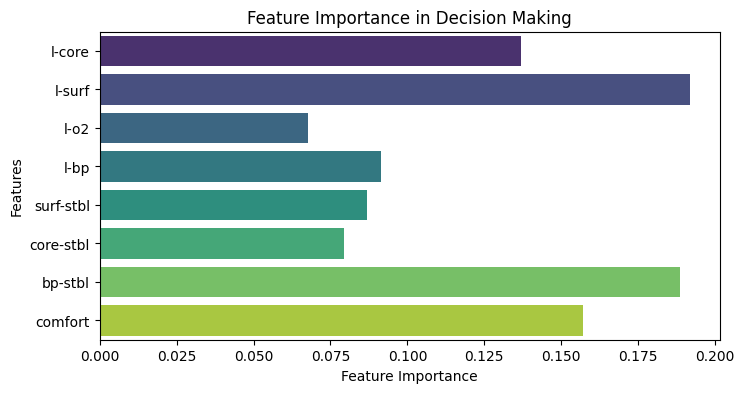

In [22]:
feature_importances = model.feature_importances_
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances, y=X_train.columns, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Making")
plt.show()

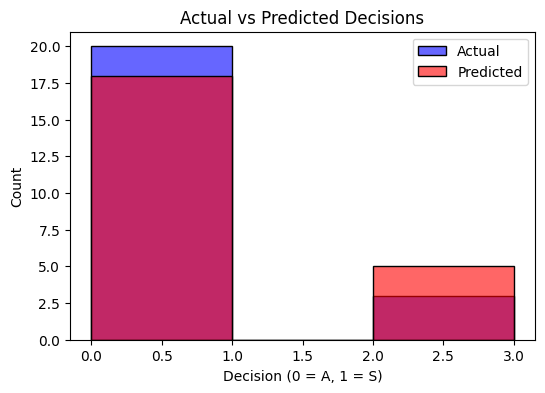

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(y_test, color="blue", label="Actual", alpha=0.6, bins=3)
sns.histplot(y_pred, color="red", label="Predicted", alpha=0.6, bins=3)
plt.legend()
plt.xlabel("Decision (0 = A, 1 = S)")
plt.title("Actual vs Predicted Decisions")
plt.show()